#### Import necessary packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
ls

 Volume in drive C is Windows7_OS
 Volume Serial Number is 3E8C-CBB6

 Directory of C:\Users\Sam

03/14/2017  12:15 PM    <DIR>          .
03/14/2017  12:15 PM    <DIR>          ..
01/24/2017  01:29 PM    <DIR>          .anaconda
08/23/2016  12:37 PM    <DIR>          .eclipse
02/27/2017  05:08 PM    <DIR>          .idlerc
03/14/2017  12:14 PM    <DIR>          .ipynb_checkpoints
01/24/2017  01:32 PM    <DIR>          .ipython
01/25/2017  11:09 AM    <DIR>          .jupyter
06/08/2016  03:14 PM    <DIR>          .LSC
03/14/2017  12:15 PM    <DIR>          .matplotlib
02/04/2016  11:54 PM    <DIR>          .oracle_jre_usage
08/23/2016  11:03 PM    <DIR>          .p2
06/08/2016  03:14 PM    <DIR>          .QtWebEngineProcess
03/13/2017  04:38 PM    <DIR>          .spyder-py3
02/04/2016  11:38 PM    <DIR>          .tooling
03/01/2017  11:55 AM    <DIR>          __pycache__
02/07/2017  02:08 PM               980 06Feb2016
02/06/2017  04:55 PM               101 06feb229
02/13/2017  05:17 PM

### Load image into python

In [3]:
img = Image.open('tiger.jpg')

In [4]:
img_gray = img.convert('LA')

In [5]:
img_gray.size

(1600, 1000)

#### Note that the dimension is 1600 x 1000. For images, the convention is (width, length). We will need to keep this in mind later when we convert this image into a matrix.

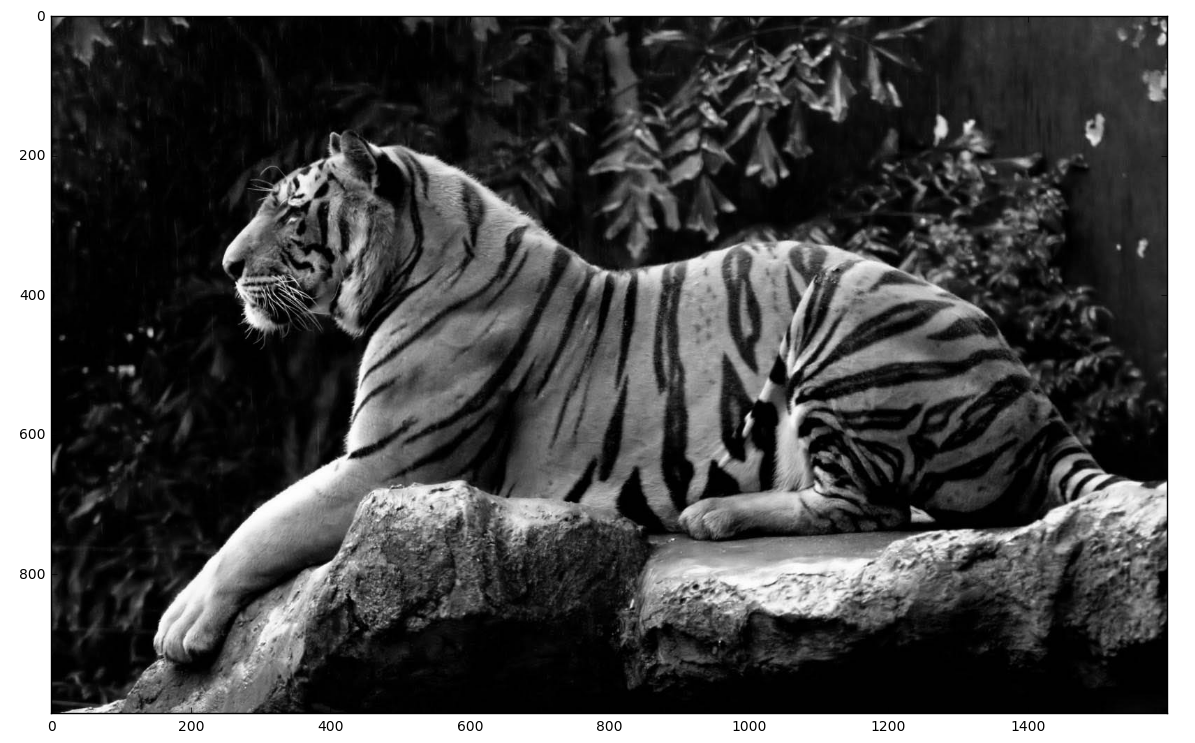

In [6]:
plt.figure(figsize = (16,9))
plt.imshow(img_gray)

### Convert image into data matrix

In [7]:
img_matrix = np.array(list(img_gray.getdata(band=0)), float)

In [8]:
img_matrix.shape

(1600000,)

#### Notice the image was converted into a single column vector. Let's reshape the image into a matrix

In [9]:
nrow = img_gray.size[1]
ncol = img_gray.size[0]

In [10]:
img_matrix = np.reshape(img_matrix, (nrow,ncol))

In [11]:
img_matrix.shape

(1000, 1600)

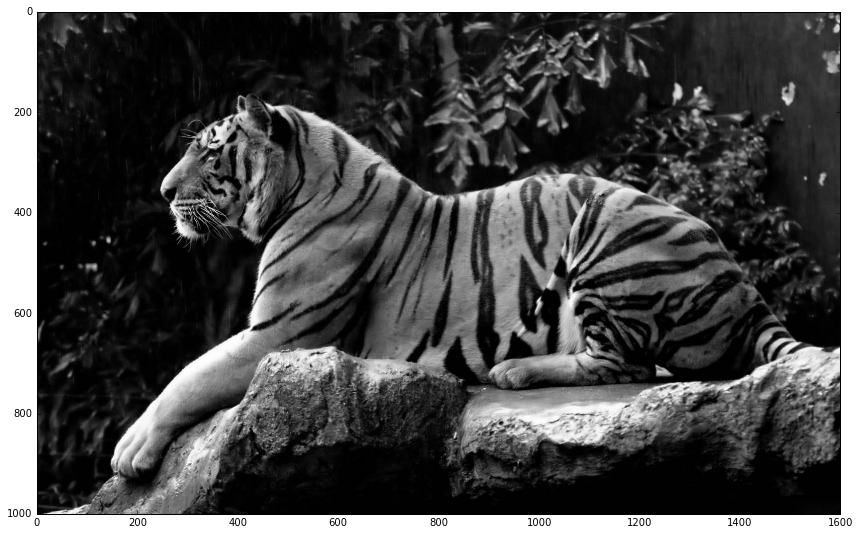

In [13]:
plt.figure(figsize = (16,9))
plt.imshow(img_matrix, cmap = 'gray')

In [14]:
img_matrix[0:10,0:10]

array([[  62.,   64.,   68.,   73.,   79.,   84.,   86.,   88.,   84.,
          88.],
       [  65.,   67.,   71.,   75.,   78.,   82.,   86.,   88.,   89.,
          94.],
       [  70.,   72.,   73.,   76.,   78.,   81.,   85.,   87.,   92.,
          99.],
       [  74.,   73.,   74.,   76.,   78.,   82.,   84.,   86.,   93.,
         102.],
       [  74.,   73.,   73.,   74.,   77.,   81.,   84.,   86.,   92.,
         105.],
       [  69.,   69.,   70.,   72.,   75.,   80.,   87.,   90.,   93.,
         109.],
       [  64.,   64.,   65.,   68.,   73.,   82.,   89.,   93.,   99.,
         115.],
       [  60.,   61.,   62.,   66.,   72.,   82.,   90.,   95.,  107.,
         121.],
       [  53.,   54.,   57.,   60.,   69.,   77.,   87.,   92.,  110.,
         111.],
       [  55.,   55.,   57.,   60.,   68.,   76.,   85.,   89.,  106.,
         108.]])

In [15]:
[U, s, V_t] = np.linalg.svd(img_matrix)


In [13]:
s.shape

(1000,)

The SVD from numpy returns the 's' matrix as a 1 - dimensional array with the singular values. You have to construct the S matrix.

In [26]:
S = np.zeros([1000,1600])
for i in range(len(S)):
    S[i,i] = s[i]
print(S)

[[ 79880.52480526      0.              0.         ...,      0.              0.
       0.        ]
 [     0.          25311.60787483      0.         ...,      0.              0.
       0.        ]
 [     0.              0.          23871.86554438 ...,      0.              0.
       0.        ]
 ..., 
 [     0.              0.              0.         ...,      0.              0.
       0.        ]
 [     0.              0.              0.         ...,      0.              0.
       0.        ]
 [     0.              0.              0.         ...,      0.              0.
       0.        ]]


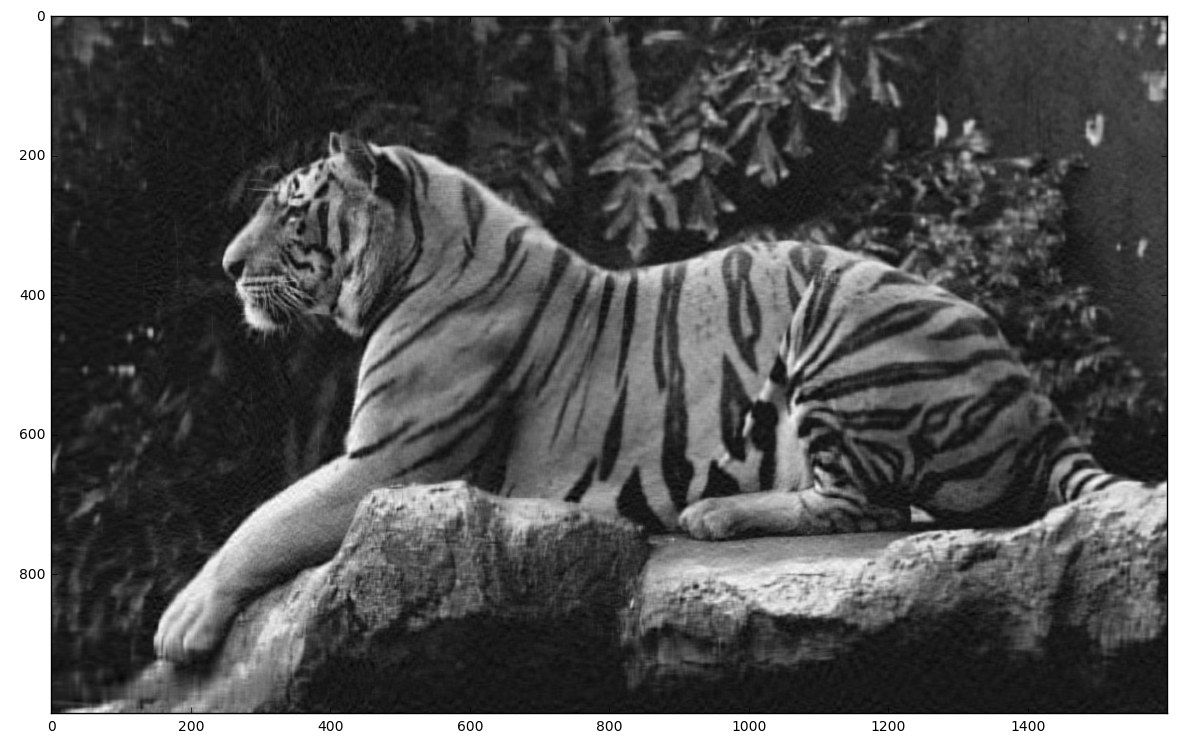

In [35]:
k = 100
U_Rank =   U[:  ,0:k]
S_Rank =   S[0:k,0:k]
V_Rank = V_t[0:k,  :]

A_New = np.dot(U_Rank, np.dot(S_Rank, V_Rank))

plt.figure(figsize = (16,9))
plt.imshow(A_New, cmap = 'gray')

k = 500 produced the best version, however by k = 200 the image was already an acceptable quality.